In [4]:
#Hierarchical clustering with complete linkage as the linkage criteria

import numpy as np 
import pandas as pd
from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from matplotlib import pyplot as plt 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.datasets import make_blobs 
%matplotlib inline


In [39]:
#Generating Random Data--------------

#Input these parameters into make_blobs:
    #n_samples: The total number of points equally divided among clusters.
#Choose a number from 10-1500
    #centers: The number of centers to generate, or the fixed center locations.
#Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]])
    #cluster_std: The standard deviation of the clusters. The larger the number, the further apart the clusters
#Choose a number between 0.5-1.5

X1, y1 = make_blobs(n_samples=50, centers=[[4,4], [-2, -1], [1, 1], [10,4]], cluster_std=0.9)

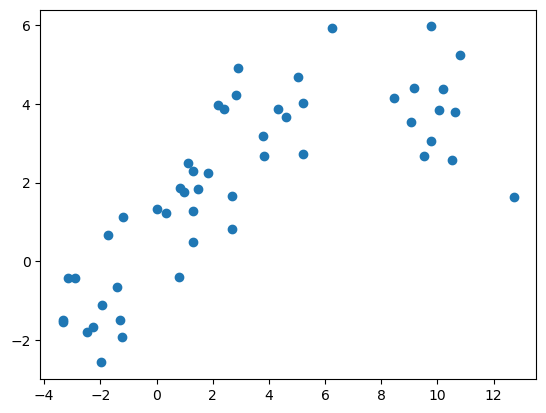

In [40]:
# Plot the scatter plot of the randomly generated data.
plt.scatter(X1[:, 0], X1[:, 1], marker='o') 


In [41]:
#Agglomerative Clustering

#n_clusters: The number of clusters to form as well as the number of centroids to generate.
    #Value will be: 4
#linkage: Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.
    #Value will be: 'complete'
#Note: It is recommended you try everything with 'average' as well

agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

In [42]:
#Fit the model with X2 and y2 from the generated data above
agglom.fit(X1,y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

[[-1.96097727 -2.56526593]
 [ 6.24141359  5.93592697]
 [ 0.32568146  1.23563432]
 [ 1.28220414  1.28603943]
 [-1.71817309  0.6590579 ]
 [ 8.45433985  4.15575328]
 [ 4.33766225  3.86069751]
 [ 1.29384454  0.50343722]
 [ 2.39034436  3.87599317]
 [ 0.84932568  1.8669557 ]
 [-3.33875363 -1.49786289]
 [-1.94831977 -1.11263717]
 [ 1.11730792  2.48904432]
 [ 2.19545096  3.975294  ]
 [10.18532989  4.36989208]
 [ 3.81017557  2.68665035]
 [-2.25300413 -1.66358198]
 [ 1.82184913  2.23606811]
 [ 0.02441786  1.32062629]
 [ 2.90549615  4.90920472]
 [-1.31539385 -1.4761442 ]
 [ 0.97613207  1.75342052]
 [ 9.06565186  3.53737042]
 [ 1.48527326  1.84781055]
 [ 5.0221051   4.69289423]
 [10.79502522  5.24565046]
 [-2.9138017  -0.41893854]
 [10.07011822  3.84068821]
 [ 0.78364715 -0.38680417]
 [-2.48806815 -1.78928497]
 [ 9.18257324  4.40015287]
 [ 9.52270195  2.66507686]
 [ 2.69116024  1.66072127]
 [-1.39217535 -0.63761983]
 [-3.31636659 -1.53376345]
 [ 3.79256689  3.18982919]
 [ 2.70027706  0.81312758]
 

In [48]:
x_max = np.max(X1, axis=0)
print(x_max)
x_min = np.min(X1, axis=0)
print(x_min)


[12.71366049  5.96424802]
[-3.33875363 -2.56526593]


[12.71366049  5.96424802]
[-3.33875363 -2.56526593]


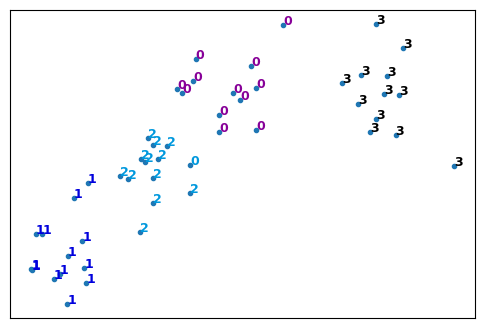

In [49]:
# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.
# x_min, x_max = np.min(X1, axis=0), np.max(X1, axis=0)
x_max = np.max(X1, axis=0)
print(x_max)
x_min = np.min(X1, axis=0)
print(x_min)

# Get the average distance for X1.
X1 = (X1 - x_min)/(x_max - x_min)


# This loop displays all of the datapoints.
for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    
# Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')

# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()


In [50]:
#Dendrogram Associated for the Agglomerative Hierarchical Clustering
#distance matrix contains the distance from each point to every other point of a dataset

#Use the function distance_matrix, which requires two inputs. 
#Use the Feature Matrix, X1 as both inputs and save the distance matrix to a variable called dist_matrix
#Remember that the distance values are symmetric, with a diagonal of 0's. 
#This is one way of making sure your matrix is correct.

dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)

[[0.         1.1200296  0.467832   ... 0.26114982 0.98391295 0.8498237 ]
 [1.1200296  0.         0.6629336  ... 0.94875628 0.40208482 0.29290619]
 [0.467832   0.6629336  0.         ... 0.29207736 0.62539647 0.38320784]
 ...
 [0.26114982 0.94875628 0.29207736 ... 0.         0.90288953 0.66063963]
 [0.98391295 0.40208482 0.62539647 ... 0.90288953 0.         0.45351785]
 [0.8498237  0.29290619 0.38320784 ... 0.66063963 0.45351785 0.        ]]


In [51]:
#Using the linkage class from hierarchy, pass in the parameters:
    #The distance matrix
    #'complete' for complete linkage - longest distance between the points in each cluster, such as the distance between point a and b.
    # 'single' for single linkage - shortest distance between two points in each cluster, such as point a and b.
    # 'average' for average linkage - average distance of each point from one cluster to every point in another cluster. 
    # 'centroid' for centroid linkage - centroid is the average of the feature sets of points in a cluster.

Z = hierarchy.linkage(dist_matrix, 'complete')

/var/folders/0w/n0wcx9c51v37zxn7w2bsvrpr0000gn/T/ipykernel_9188/250929052.py:4: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


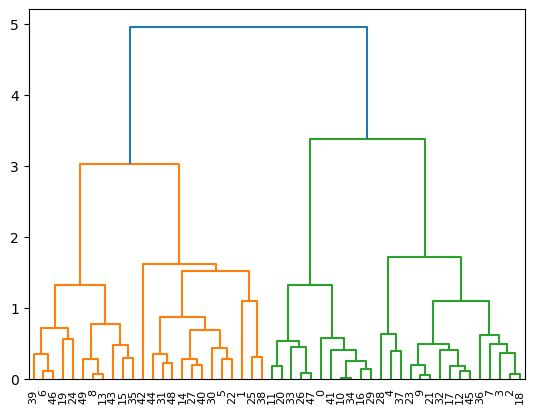

In [52]:
dendro = hierarchy.dendrogram(Z)

/var/folders/0w/n0wcx9c51v37zxn7w2bsvrpr0000gn/T/ipykernel_9188/1836840129.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  A =  hierarchy.linkage(dist_matrix, 'average')


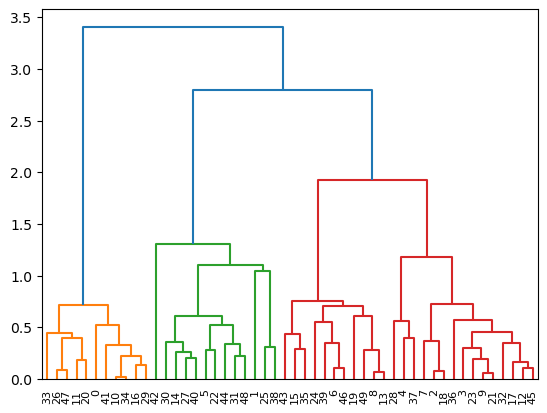

In [57]:
A =  hierarchy.linkage(dist_matrix, 'average')
dendro_average = hierarchy.dendrogram(A)